## StoneWall

You are going to build a stone wall. The wall should be straight and N meters long, and its thickness should be constant; however, it should have different heights in different places. The height of the wall is specified by an array H of N positive integers. H[I] is the height of the wall from I to I+1 meters to the right of its left end. In particular, H[0] is the height of the wall's left end and H[N−1] is the height of the wall's right end.

The wall should be built of cuboid stone blocks (that is, all sides of such blocks are rectangular). Your task is to compute the minimum number of blocks needed to build the wall.

Write a function:

**def solution(H)**

that, given an array H of N positive integers specifying the height of the wall, returns the minimum number of blocks needed to build it.

For example, given array H containing N = 9 integers:

  H[0] = 8    H[1] = 8    H[2] = 5<br>
  H[3] = 7    H[4] = 9    H[5] = 8<br>
  H[6] = 7    H[7] = 4    H[8] = 8
  
the function should return 7. The figure shows one possible arrangement of seven blocks.

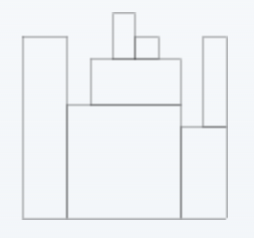

Write an efficient algorithm for the following assumptions:

N is an integer within the range [1..100,000];<br>
each element of array H is an integer within the range [1..1,000,000,000].

In [3]:
%matplotlib inline
import numpy as np
import pandas as pandas
import matplotlib.pyplot as plt
import time as time

import math
import operator

In [5]:
def solution(A):
    count_blocks = 0
    prior_levels = set([A[0]])
    last_height = 0
    for i in range(0,len(A)):

        next_height = A[i] # get height of next block

        if next_height > last_height: # definitely need a new block per height increase
            
            count_blocks += 1
            prior_levels.add(next_height) # remember levels before the increase

        if next_height == last_height: # don't need new block if nothing changes
            pass

        if next_height < last_height:
            if next_height in prior_levels: # if next block is at the level of a prior block, we can build a "spanning" block
                prior_levels.add(next_height)
                prior_levels = set(filter(lambda x: x <= next_height, prior_levels)) # delete all higher levels from the memory            

            else: # otherwise we need a new block
                count_blocks += 1
                prior_levels.add(next_height)
                prior_levels = set(filter(lambda x: x <= next_height, prior_levels)) # delete all higher levels from the memory            

        last_height = A[i] # remember height for next iteration
        
    return count_blocks
    
    
A = [8,8,5,7,9,8,7,4,8]
A = [8,8,5,7,9,7,7,4,8]
A = [1,2,3,4,5,5,4,3,2,1]
A = [1,2,3,4,2,2,4,3,2,1]
A = [10,10,11,10,10]

solution(A)

2

Text(0, 0.5, 'time')

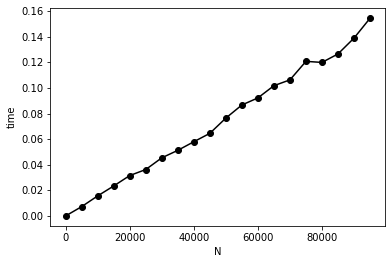

In [6]:
# check time complexity (N)
n_range = np.arange(1,100000,5000)
speed1   = []
results1 = []
for N in n_range:
    
    A = np.random.randint(1,1000000,N)
    
    t1 = time.time()
    result1 = solution(A)
    t2 = time.time()
    speed1.append(t2-t1)

    results1.append(result1)

        
plt.plot(n_range, speed1, 'ko-')

plt.xlabel('N')
plt.ylabel('time')